# Predicting Disease Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has disease based on their medical attributes.

Approach we're going to take :

Problem definition
Data
Evaluation
Features
Modelling
Experimentation

## 1. Problem Definition

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have disease?

## 2. Data
The data came from
https://drive.google.com/file/d/10ogdjtaWNwE3RBCc6nsHXOFdZuqU0GNG/view?usp=drive_link

## 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has a disease.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset)
1. Age -
2. Gender - Male or Female
3. Temperature -
4. Heart Rate (Beats Per Minute)
5. SPO2
6. Diagnosis
7. Result

### 5. Results
1. Acute Gastroenteritis (AGE)
2. ⁠Upper Respiratory Tract Infection (URTI)
3. ⁠Generalized Anxiety Disorder (GAD)
4. ⁠Gastroesophageal Reflux Disease (GERD)
5. ⁠Functional Dyspepsia (FD)

In [ ]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


## Preparing & Importing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/fyp_dataset_cleaned.csv", encoding="latin1")
df.shape # rows and columns

(378, 8)

In [ ]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


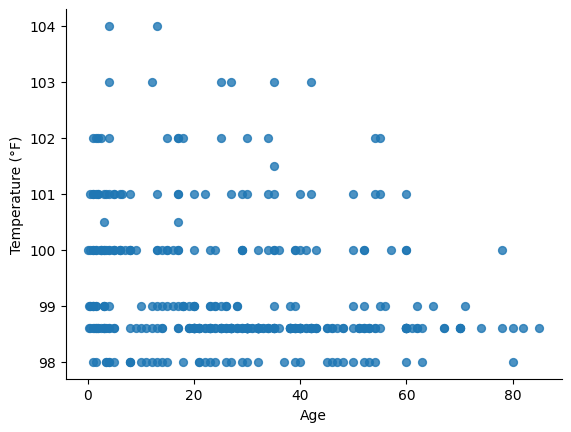

In [ ]:
# @title Age vs Temperature (°F)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Temperature (°F)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.tail()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
373,60.0,female,98.6,85.0,98,loose motion,bodyache,age
374,32.0,male,98.6,76.0,99,abdominal pain,bodyache,fd
375,65.0,female,99.0,84.0,99,dizziness,nausea,fd
376,13.0,female,104.0,70.0,99,loose motion,vomiting,age
377,31.0,female,98.6,91.0,97,loose motion,vomiting,age


In [ ]:
# Let's find out how many of each class there
df["Result"].value_counts()


Result
age          135
urti          94
fever         72
fd            29
hyperemic     18
gad           15
gerd          15
Name: count, dtype: int64

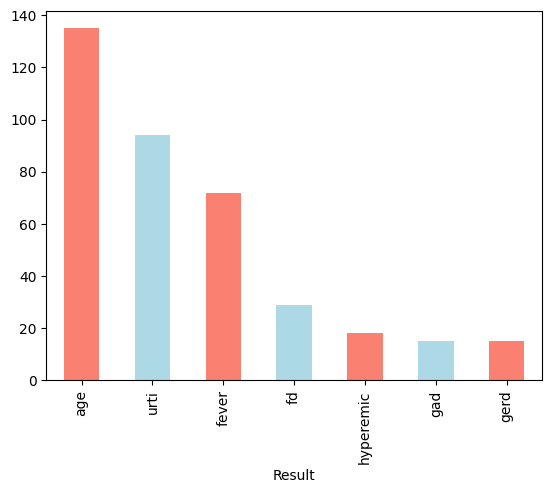

In [ ]:
df["Result"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);


In [ ]:
# Are there any missing values?
df.isna().sum()


Age                 0
Gender              0
Temperature (°F)    0
Heart Rate (bpm)    0
SPO2 (%)            0
Diagnosis           0
Diagnosis_2         0
Result              0
dtype: int64

In [ ]:
df.describe()

,Age,Temperature (°F),Heart Rate (bpm),SPO2 (%)
count,378.000000,378.000000,378.000000,378.000000
mean,27.701455,99.222487,99.736232,97.798942
std,19.576981,1.163092,17.559372,1.688406
min,0.100000,98.000000,58.000000,86.000000
25%,12.000000,98.600000,90.250000,98.000000
50%,27.000000,98.600000,99.736232,98.000000
75%,40.000000,100.000000,110.000000,99.000000
max,85.000000,104.000000,163.000000,100.000000


# Disease Frequency According to Gender

In [ ]:
df.Gender.value_counts()

Gender
female    245
male      133
Name: count, dtype: int64

In [ ]:
# Compare Result column with Gender column
pd.crosstab(df.Result, df.Gender)


Gender,female,male
Result,,
age,102,33
fd,23,6
fever,34,38
gad,12,3
gerd,7,8
hyperemic,10,8
urti,57,37


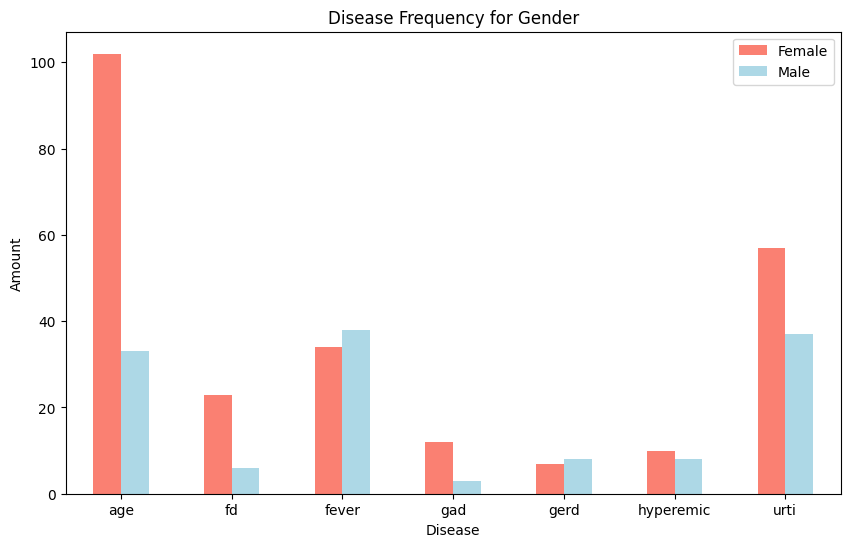

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.Result, df.Gender).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"]);

plt.title("Disease Frequency for Gender")
plt.xlabel("Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

# Age vs Heart Rate for Disease

In [ ]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


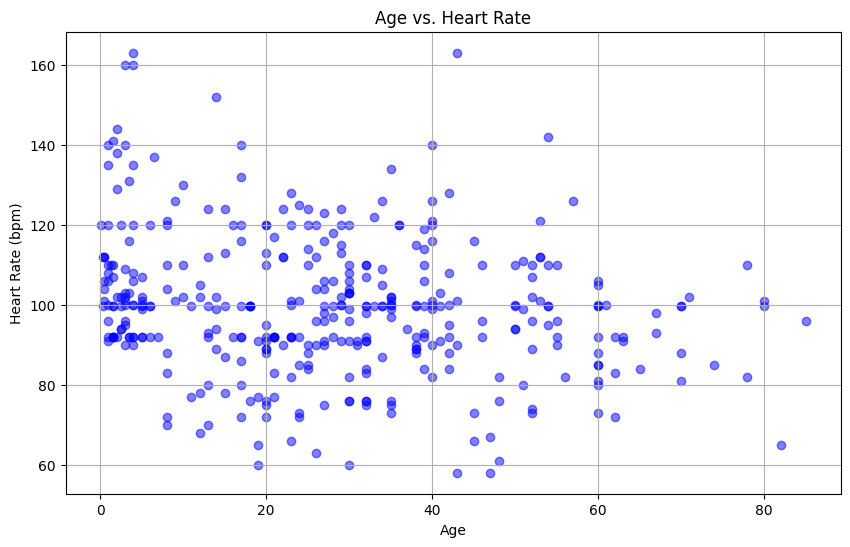

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Heart Rate (bpm)'], c='blue', alpha=0.5)
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.show()

In [ ]:
df.Age.value_counts().head(20)

Age
30.0    15
32.0    14
20.0    13
60.0    12
35.0    11
4.0     11
17.0    10
40.0    10
3.0     10
27.0    10
23.0     9
1.5      9
39.0     8
29.0     8
5.0      8
38.0     8
25.0     8
8.0      8
21.0     7
13.0     7
Name: count, dtype: int64

In [ ]:
df.Age.value_counts().tail()

Age
74.0    1
71.0    1
7.0     1
37.0    1
65.0    1
Name: count, dtype: int64

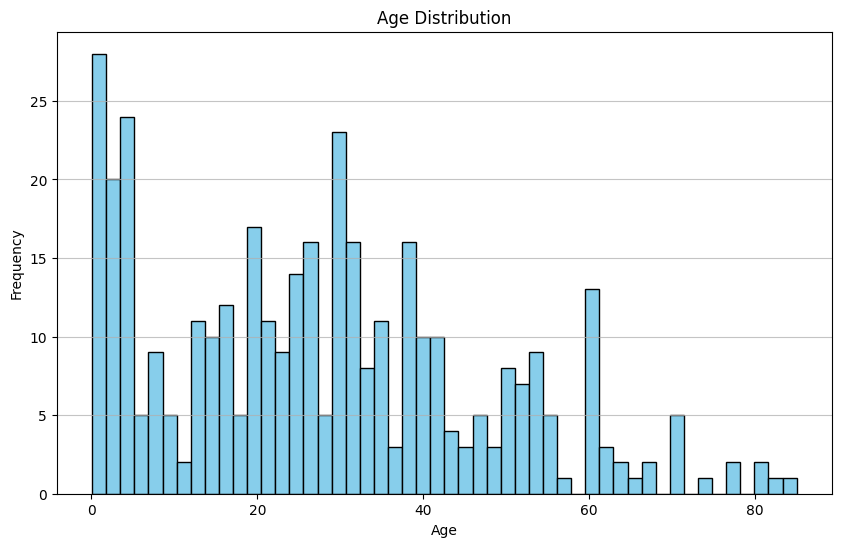

In [ ]:
# Check the distribution of the age column with a histrogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=50, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


Correlation between Age and Heart Rate: -0.21305940543794702
Correlation between Age and SPO2: -0.08027155778313785
Correlation between Age and Temperature: -0.22426168301351046


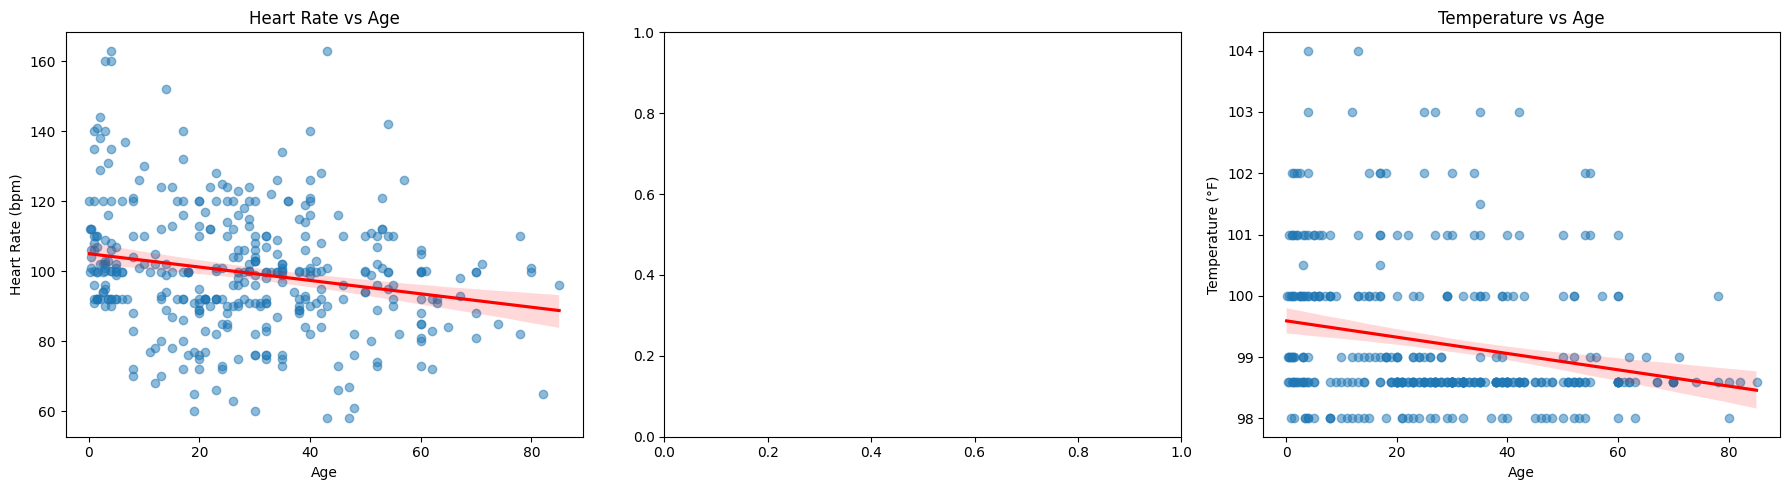

In [ ]:
# Calculate correlation coefficients
correlation_hr = df['Age'].corr(df['Heart Rate (bpm)'])
correlation_spo2 = df['Age'].corr(df['SPO2 (%)'])
correlation_temp = df['Age'].corr(df['Temperature (°F)'])

print(f'Correlation between Age and Heart Rate: {correlation_hr}')
print(f'Correlation between Age and SPO2: {correlation_spo2}')
print(f'Correlation between Age and Temperature: {correlation_temp}')

# Plotting scatter plots with trend lines
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Heart Rate vs Age
sns.regplot(x='Age', y='Heart Rate (bpm)', data=df, ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0].set_title('Heart Rate vs Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Heart Rate (bpm)')



# Temperature vs Age
sns.regplot(x='Age', y='Temperature (°F)', data=df, ax=axes[2], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[2].set_title('Temperature vs Age')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Temperature (°F)')

plt.tight_layout()
plt.show()

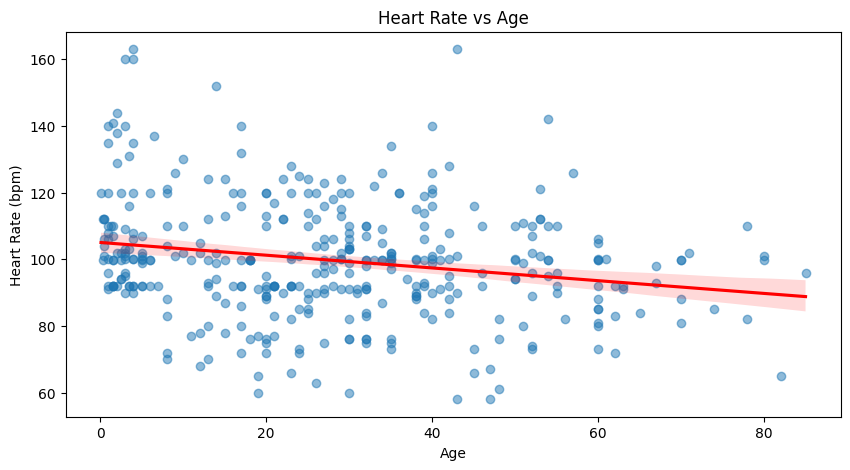

In [ ]:
# Plot Heart Rate vs Age
plt.figure(figsize=(10, 5))
sns.regplot(x='Age', y='Heart Rate (bpm)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Heart Rate vs Age')
plt.xlabel('Age')
plt.ylabel('Heart Rate (bpm)')
plt.show()


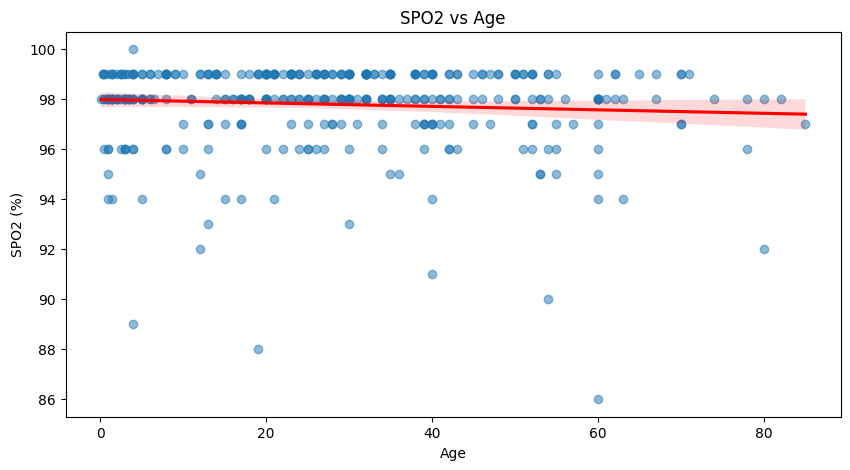

In [ ]:
# Plot SPO2 vs Age
plt.figure(figsize=(10, 5))
sns.regplot(x='Age', y='SPO2 (%)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('SPO2 vs Age')
plt.xlabel('Age')
plt.ylabel('SPO2 (%)')
plt.show()


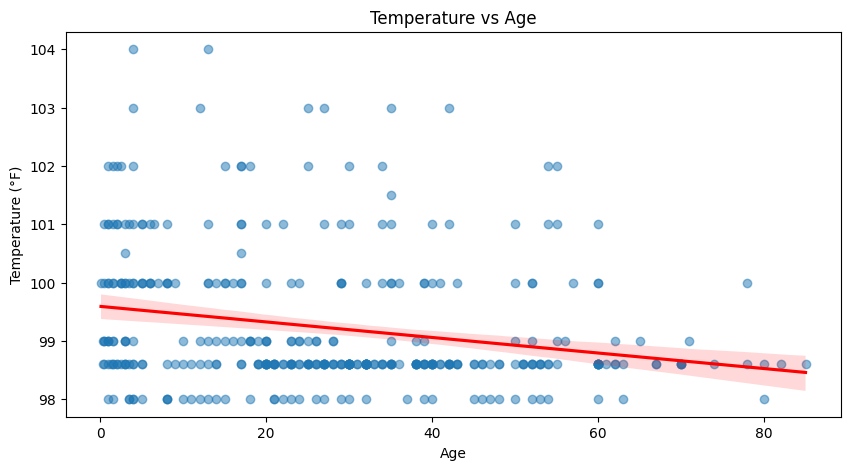

In [ ]:
# Plot Temperature vs Age
plt.figure(figsize=(10, 5))
sns.regplot(x='Age', y='Temperature (°F)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Temperature vs Age')
plt.xlabel('Age')
plt.ylabel('Temperature (°F)')
plt.show()


In [ ]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


In [ ]:
df.apply(pd.to_numeric)

ValueError: Unable to parse string "female" at position 0

In [ ]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


In [ ]:
df_2 = pd.get_dummies(df,columns=["Gender"],drop_first=True)

In [ ]:
df_2.head()

,Age,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result,Gender_male
0,20.0,99.0,91.0,99,sore throat,fever,urti,False
1,24.0,99.0,73.0,99,cough,sore throat,urti,False
2,26.0,99.0,112.0,99,chest pain,fever,urti,False
3,63.0,98.6,92.0,98,loose motion,vomiting,age,True
4,39.0,98.0,92.0,97,breathlessness,dizziness,gad,False


In [ ]:
df_2.rename(columns={'Gender_male': 'Gender'}, inplace=True)

In [ ]:
df_2.head()

,Age,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result,Gender
0,20.0,99.0,91.0,99,sore throat,fever,urti,False
1,24.0,99.0,73.0,99,cough,sore throat,urti,False
2,26.0,99.0,112.0,99,chest pain,fever,urti,False
3,63.0,98.6,92.0,98,loose motion,vomiting,age,True
4,39.0,98.0,92.0,97,breathlessness,dizziness,gad,False
